In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
dataset_path = 'H:/Food-Classification-Model/dataset/PHFood_Brazil.csv'  # Replace with your dataset file name
# Loading the dataset with low_memory set to False
df = pd.read_csv(dataset_path, low_memory=False)


# Displaying the first few rows of the dataset to check
df.head()


,Unnamed: 0,Year,Food,Food (English),Region,State,Harvest Area (hectares),Food Production (tons),Energy (kcal),Protein (g),...,Authorized,Maximum Residue Limit (MRL),Acceptable Daily Intake (ADI),Residue Percentage,Food Acquisition (kg),Food Group (FG),Population Food Group,Bean Intake (Food Group),Vegetable Intake (Food Group),Fruit Intake (Food Group)
0,1,1974,ABACATE,AVOCADO,MIDWEST,DISTRITO FEDERAL,56.0,1176.0,1.411200e+09,2.622480e+07,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
1,2,1974,ABACAXI,PINEAPPLE,MIDWEST,DISTRITO FEDERAL,58.0,139.0,6.672000e+07,7.506000e+05,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
2,3,1974,ALHO,GARLIC,MIDWEST,DISTRITO FEDERAL,2.0,3.0,4.470000e+06,1.908000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1974,AMENDOIM,PEANUT,MIDWEST,DISTRITO FEDERAL,25.0,21.0,1.190700e+08,5.418000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1974,ARROZ,RICE,MIDWEST,DISTRITO FEDERAL,900.0,864.0,1.131370e+09,2.214333e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in each column:")
print(missing_values)

# Checking the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)


Missing Values in each column:
Unnamed: 0                            0
Year                                  0
Food                               2196
Food (English)                     2196
Region                             1026
State                              1026
Harvest Area (hectares)            6611
Food Production (tons)             6611
Energy (kcal)                      6611
Protein (g)                       23495
Lipids (g)                         6611
Carbohydrates (g)                  6611
Fiber (g)                         23495
Calcium (mg)                       6611
Magnesium (mg)                     8121
Manganese (mg)                    25005
Phosphorus (mg)                   23495
Iron (mg)                         23495
Potassium (mg)                     8121
Copper (mg)                        8121
Zinc (mg)                          8121
Selenium (mcg)                    64284
Retinol (mcg)                    433881
Vitamin A (mcg)                  183858
Vitamin B

In [3]:
# Step 1: Dropping columns with more than 50% missing values
threshold = 50  # Percentage threshold
missing_percentage = (df.isnull().sum() / len(df)) * 100
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=columns_to_drop, inplace=True)

print(f"Columns dropped: {list(columns_to_drop)}")

# Step 2: Filling missing values
# For numerical columns, use median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# For categorical columns, use mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Step 3: Checking if any missing values are left
print("\nRemaining Missing Values:")
print(df.isnull().sum().sum())  # Should print 0 if all missing values are handled


Columns dropped: ['Retinol (mcg)', 'Water Need', 'Water Use', 'Water Deficit', 'Water Deficit Percentage', 'Class', 'Authorized', 'Maximum Residue Limit (MRL)', 'Acceptable Daily Intake (ADI)', 'Residue Percentage', 'Food Acquisition (kg)', 'Population Food Group', 'Bean Intake (Food Group)', 'Vegetable Intake (Food Group)', 'Fruit Intake (Food Group)']

Remaining Missing Values:
0


In [4]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['Food', 'Food (English)', 'Region', 'State',
       'Commercial pesticide name', 'Pesticide', 'Organic', 'Toxic Class',
       'Environmental Impact', 'Food Group (FG)'],
      dtype='object')


In [5]:
# Checking summary statistics to identify scaling needs
df.describe()


,Unnamed: 0,Year,Harvest Area (hectares),Food Production (tons),Energy (kcal),Protein (g),Lipids (g),Carbohydrates (g),Fiber (g),Calcium (mg),...,Selenium (mcg),Vitamin A (mcg),Vitamin B1 (mg),Vitamin B2 (mg),Vitamin B3 (mg),Equivalent Vitamin B3 (mg),Vitamin B6 (mg),Folate (mcg),Vitamin C (mg),CODE
count,439299.00000,439299.000000,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,...,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05
mean,219650.00000,2012.546698,1.890169e+05,1.523577e+06,1.702954e+12,5.491202e+10,5.171598e+10,2.951138e+11,3.292349e+10,3.425900e+11,...,3.822048e+10,5.474827e+10,1.282995e+09,9.929333e+08,6.929730e+09,1.889513e+10,9.405000e+08,2.928003e+11,3.035972e+10,1.011150e+05
std,126814.84229,9.809825,7.251294e+05,1.507207e+07,1.192108e+13,3.347019e+11,2.649330e+11,3.005522e+12,1.540603e+11,2.187856e+12,...,2.074296e+11,2.696950e+11,5.884184e+09,5.831345e+09,3.658404e+10,9.800268e+10,5.080744e+09,1.376630e+12,3.046992e+11,3.903412e+05
min,1.00000,1974.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.120000e+02
25%,109825.50000,2008.000000,2.600000e+01,1.680000e+02,5.940000e+07,1.712500e+06,3.080000e+05,1.258190e+07,3.125000e+06,1.952987e+07,...,1.141800e+07,3.401036e+08,1.104000e+05,1.175000e+05,7.504000e+05,2.162000e+06,1.522200e+05,3.135000e+07,5.771500e+08,1.091500e+04
50%,219650.00000,2018.000000,3.209000e+03,1.690900e+04,1.320042e+10,3.091297e+08,1.194831e+08,2.432425e+09,4.071340e+08,2.541489e+09,...,2.261200e+08,1.186592e+09,1.183840e+07,5.240000e+06,2.845752e+07,1.460933e+08,1.113896e+07,2.717760e+09,1.362072e+09,1.891700e+04
75%,329474.50000,2018.000000,6.548700e+04,1.594270e+05,1.343731e+11,2.954086e+09,2.085573e+09,2.498664e+10,3.584347e+09,2.793276e+10,...,1.589882e+09,2.665035e+09,1.096714e+08,3.862684e+07,2.892364e+08,1.153450e+09,9.545328e+07,2.518408e+10,2.608531e+09,3.011700e+04
max,439299.00000,2023.000000,1.092462e+07,4.504246e+08,3.314224e+14,6.327424e+12,4.415128e+12,8.994979e+13,2.281523e+12,3.878589e+13,...,4.112795e+12,1.086597e+13,9.008491e+10,1.083724e+11,7.196332e+11,1.685285e+12,8.897941e+10,2.907930e+13,5.156729e+13,3.848304e+06


In [7]:
# Selecting only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Finding highly correlated features (above 0.85 correlation)
corr_matrix = numeric_df.corr()
high_corr_features = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features < 1].reset_index()
high_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display highly correlated features (above 0.85)
print("Highly Correlated Features (above 0.85):\n", high_corr_features[high_corr_features['Correlation'] > 0.85])



Highly Correlated Features (above 0.85):
                    Feature 1               Feature 2  Correlation
0          Carbohydrates (g)  Food Production (tons)     0.996887
1     Food Production (tons)       Carbohydrates (g)     0.996887
2            Vitamin B2 (mg)             Protein (g)     0.995470
3                Protein (g)         Vitamin B2 (mg)     0.995470
4            Vitamin B6 (mg)         Phosphorus (mg)     0.992471
..                       ...                     ...          ...
209  Harvest Area (hectares)               Iron (mg)     0.859880
210          Vitamin B6 (mg)            Calcium (mg)     0.856852
211             Calcium (mg)         Vitamin B6 (mg)     0.856852
212                Fiber (g)             Copper (mg)     0.850002
213              Copper (mg)               Fiber (g)     0.850002

[214 rows x 3 columns]


In [16]:
# Step 1: Outlier Detection using Z-score
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for the numerical columns
numeric_df = df.select_dtypes(include=['number'])  # Only consider numerical columns
z_scores = np.abs(zscore(numeric_df))

# Identifying outliers (Z-score > 3)
outliers_zscore = (z_scores > 3).sum(axis=0)
print("Number of Outliers detected by Z-score (threshold 3):")
print(outliers_zscore)


Number of Outliers detected by Z-score (threshold 3):
[    0 10829     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0]


In [17]:
# Step 2: Remove rows with outliers based on Z-score

# Example: Removing rows where any feature has a Z-score > 2.5 (adjusted threshold)
df_no_outliers_zscore = df[(z_scores < 2.5).all(axis=1)]  # Lowering the threshold to 2.5

# Checking the shape of the data after removing outliers
print(f"\nOriginal shape: {df.shape}")
print(f"Shape after removing outliers (Z-score method): {df_no_outliers_zscore.shape}")



Original shape: (439299, 52)
Shape after removing outliers (Z-score method): (0, 52)


In [18]:
# Step 3: Outlier Detection using IQR (Interquartile Range)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers (values outside the range: Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum(axis=0)
print("\nNumber of Outliers detected by IQR method:")
print(outliers_iqr)



Number of Outliers detected by IQR method:
Unnamed: 0                           0
Year                             24071
Harvest Area (hectares)          73344
Food Production (tons)           74325
Energy (kcal)                    78013
Protein (g)                      73999
Lipids (g)                       76945
Carbohydrates (g)                77125
Fiber (g)                        74460
Calcium (mg)                     73692
Magnesium (mg)                   77208
Manganese (mg)                   72190
Phosphorus (mg)                  73980
Iron (mg)                        77515
Potassium (mg)                   72108
Copper (mg)                      71758
Zinc (mg)                        80102
Selenium (mcg)                   68452
Retinol (mcg)                      606
Vitamin A (mcg)                  47565
Vitamin B1 (mg)                  74225
Vitamin B2 (mg)                  68832
Vitamin B3 (mg)                  68540
Equivalent Vitamin B3 (mg)       68595
Vitamin B6 (mg)     

In [19]:
# Step 4: Remove rows with outliers based on IQR
df_no_outliers_iqr = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Checking the shape of the data after removing outliers
print(f"\nOriginal shape: {df.shape}")
print(f"Shape after removing outliers (IQR method): {df_no_outliers_iqr.shape}")



Original shape: (439299, 52)
Shape after removing outliers (IQR method): (229135, 52)


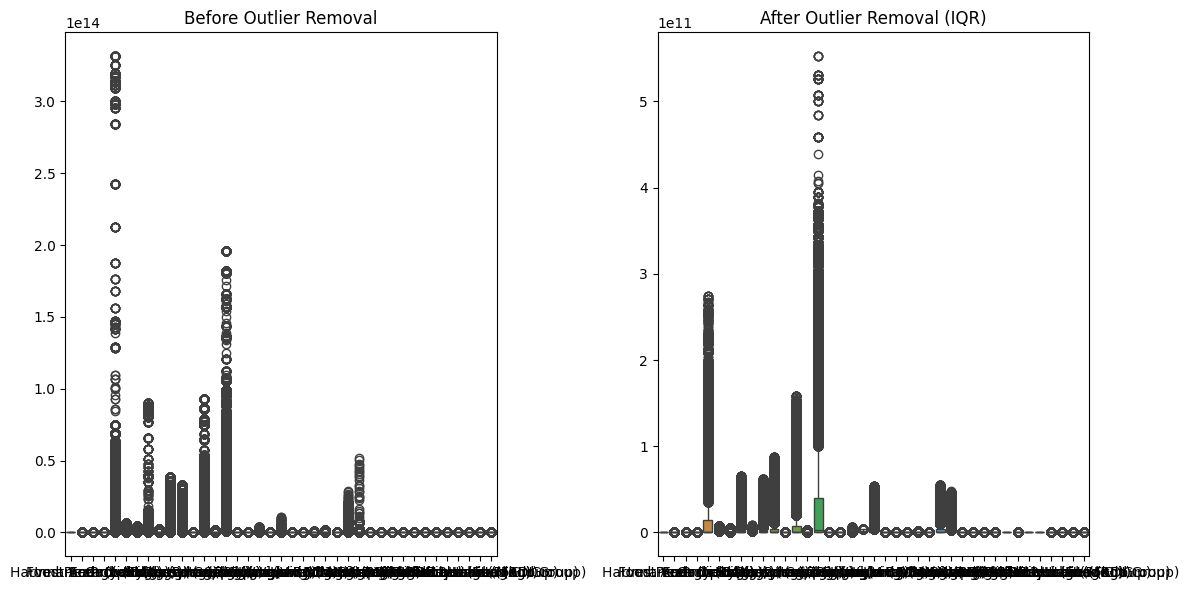

In [20]:
# Step 5: Visualizing the distribution of outliers before and after removal (Box plot)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Before removing outliers (Original data)
plt.subplot(1, 2, 1)
sns.boxplot(data=numeric_df)
plt.title('Before Outlier Removal')

# After removing outliers (IQR method)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers_iqr.select_dtypes(include=['number']))
plt.title('After Outlier Removal (IQR)')

plt.tight_layout()
plt.show()


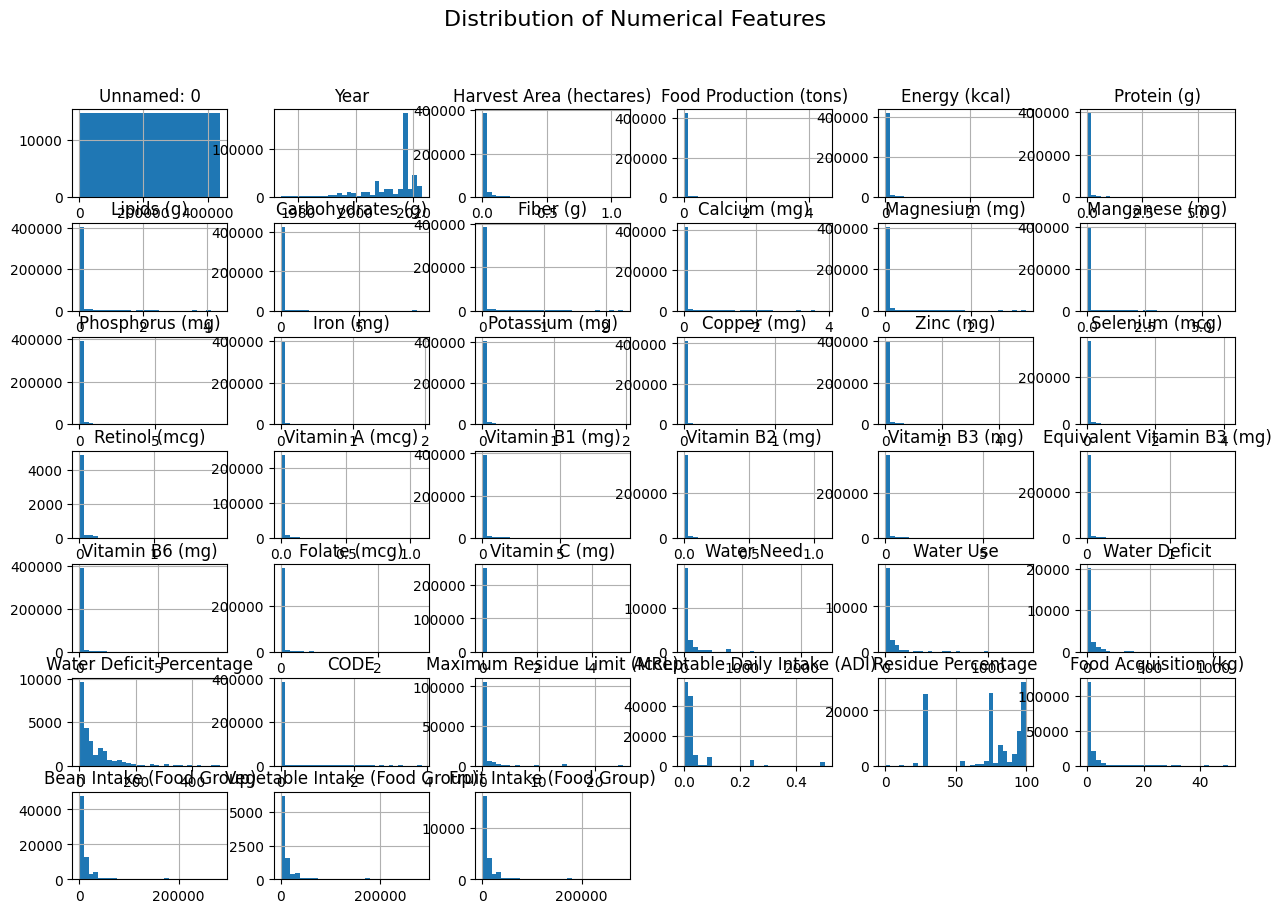

In [21]:
# Summary statistics for numerical columns
df.describe()

# Data distribution for numerical columns (e.g., histograms for each numerical feature)
numerical_columns = df.select_dtypes(include=['number']).columns

# Plotting histograms for numerical columns
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


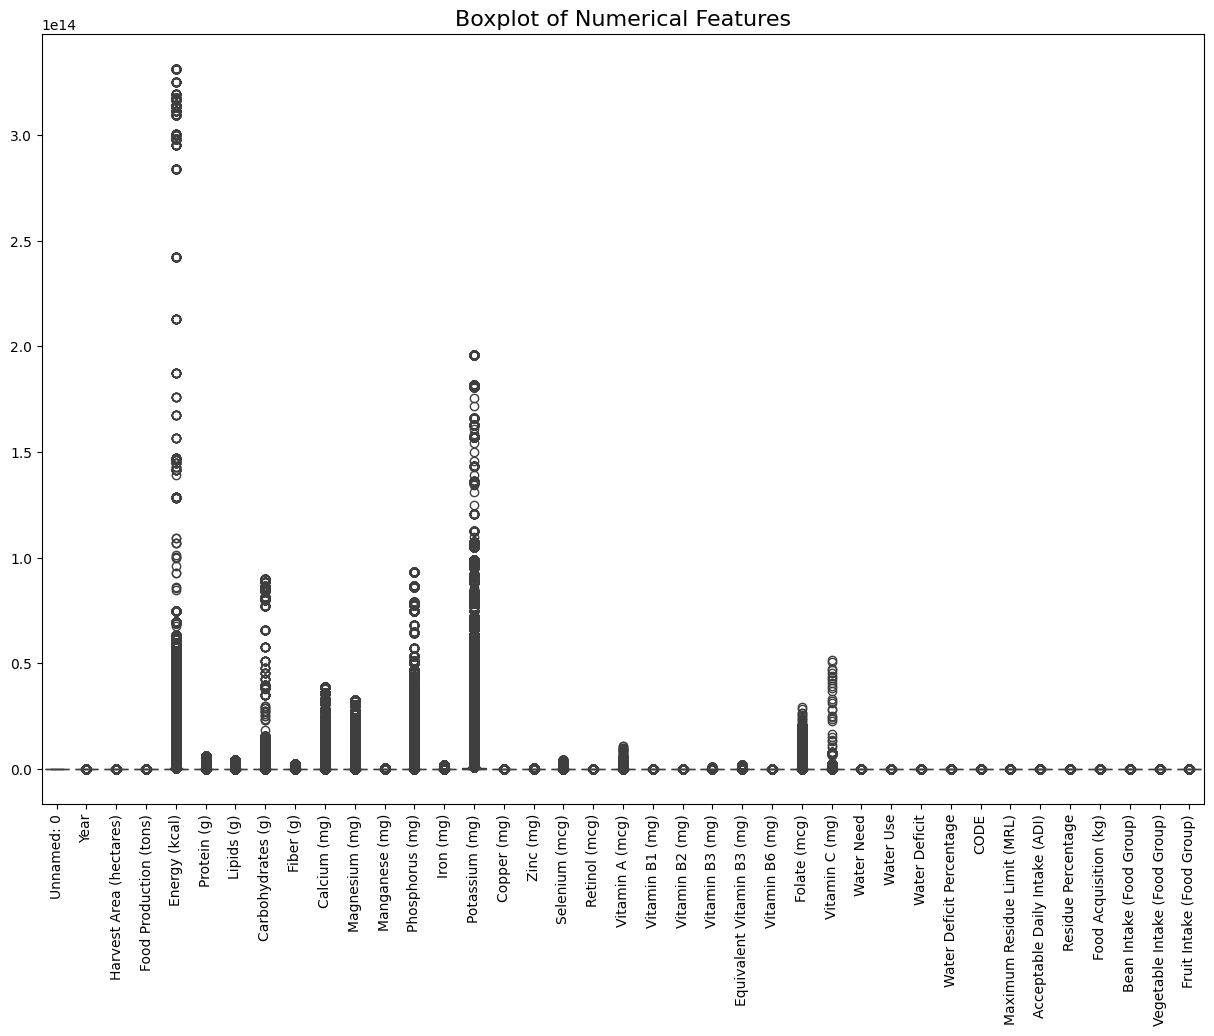

In [22]:
# Boxplot for numerical columns to check for spread and any potential outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.show()


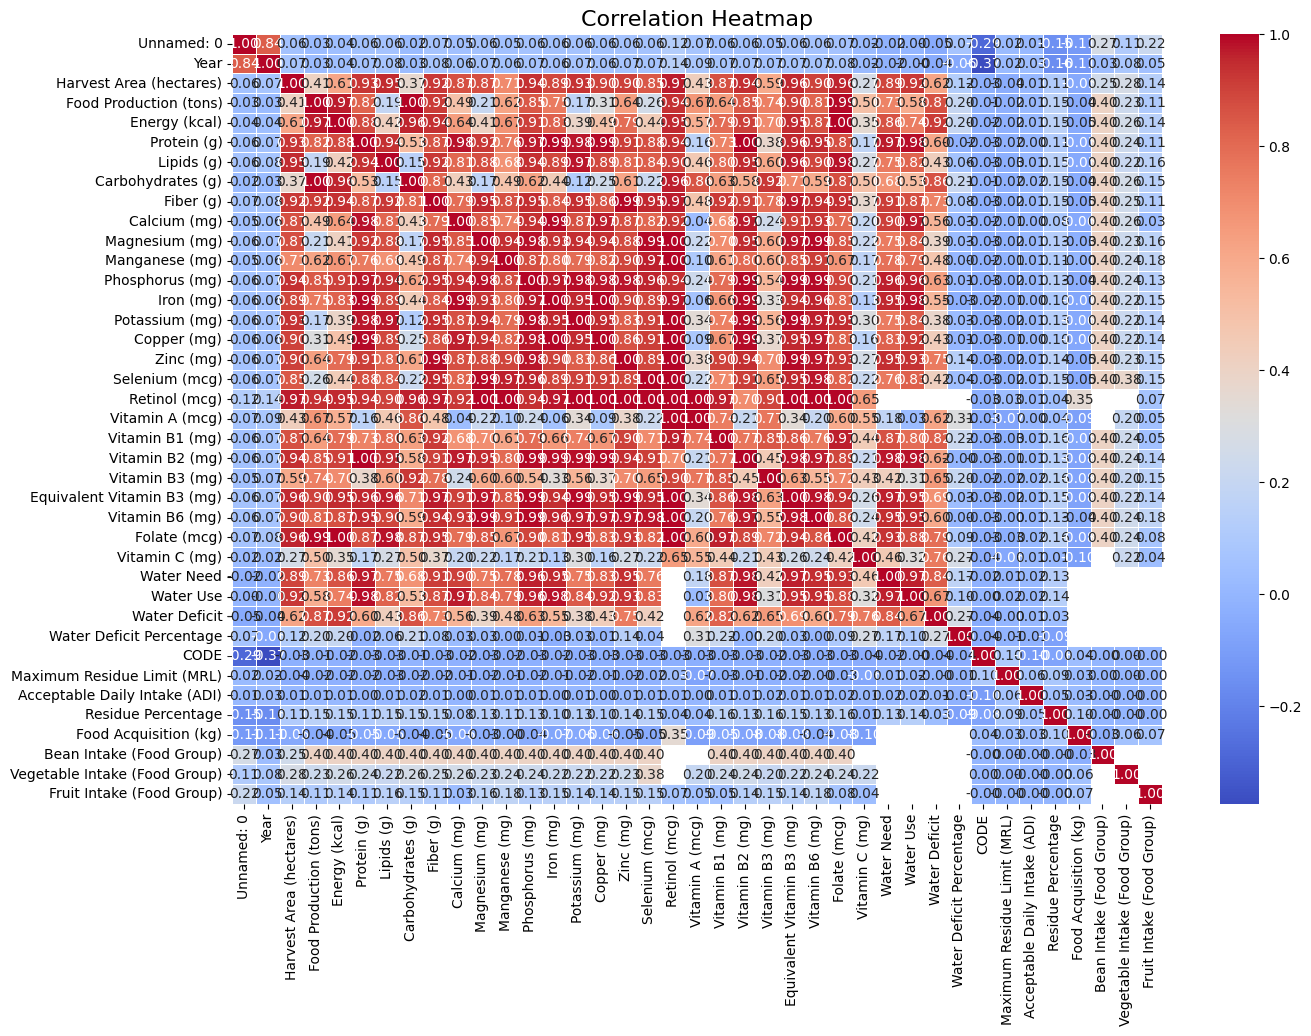

In [23]:
# Correlation heatmap for numerical features
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Data Preprocessing
# Drop columns that are not relevant for model training
df_cleaned = df.drop(columns=['Unnamed: 0', 'Food', 'Food (English)', 'Region', 'State', 'Class', 
                              'Commercial pesticide name', 'Pesticide', 'Toxic Class', 'Environmental Impact', 
                              'Authorized', 'Maximum Residue Limit (MRL)', 'Acceptable Daily Intake (ADI)', 
                              'Residue Percentage', 'Food Acquisition (kg)', 'Food Group (FG)', 
                              'Population Food Group', 'Bean Intake (Food Group)', 
                              'Vegetable Intake (Food Group)', 'Fruit Intake (Food Group)', 'CODE'])

# Step 2: Create the target variable (classifying food into healthy or unhealthy)
df_cleaned['target_column'] = np.where(df_cleaned['Energy (kcal)'] < 200, 'healthy', 'unhealthy')

# Step 3: Separate features (X) and target variable (y)
X = df_cleaned.drop(columns=['target_column'])  # Features
y = df_cleaned['target_column']  # Target variable

# Step 4: Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert 'healthy'/'unhealthy' into 0/1

# Step 5: Handle categorical features in X (if any)
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop first to avoid multicollinearity

# Step 6: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean of the column
X_encoded_imputed = imputer.fit_transform(X_encoded)  # Apply the imputer to the features

# Step 7: Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_imputed, y_encoded, test_size=0.2, random_state=42)

# Step 8: Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg_model.predict(X_test)

# Step 9: Train Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Step 10: Evaluate both models
# Logistic Regression evaluation
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))

# Decision Tree evaluation
print("Decision Tree Classifier Evaluation:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19319
           1       1.00      1.00      1.00     68541

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860

Confusion Matrix for Logistic Regression:
[[19319     0]
 [    1 68540]]
Decision Tree Classifier Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19319
           1       1.00      1.00      1.00     68541

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860

Confusion Matrix for Decision Tree:
[[19319     0]
 [    0 68541]]


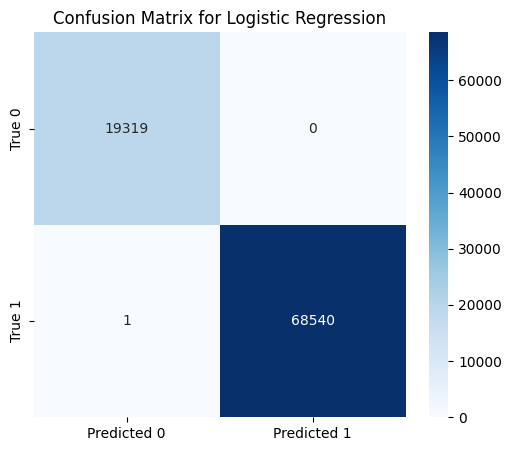

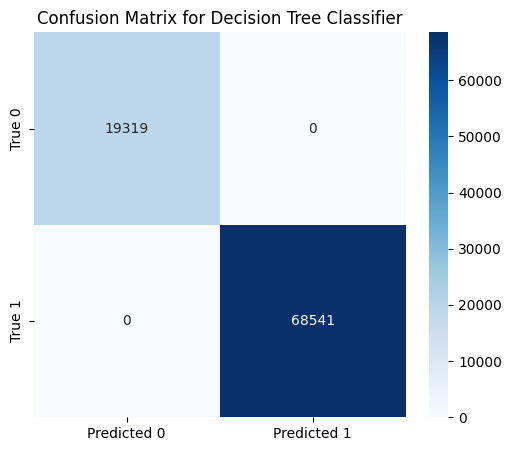

Logistic Regression Evaluation Metrics:
       precision  recall  f1-score  accuracy  support
Class                                                
0            1.0     1.0       1.0       1.0    19319
1            1.0     1.0       1.0       1.0    68541

Decision Tree Classifier Evaluation Metrics:
       precision  recall  f1-score  accuracy  support
Class                                                
0            1.0     1.0       1.0       1.0    19319
1            1.0     1.0       1.0       1.0    68541

Logistic Regression: precision=1.00, recall=1.00, f1-score=1.00, accuracy=1.00
Decision Tree Classifier: precision=1.00, recall=1.00, f1-score=1.00, accuracy=1.00


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

# Evaluation data for Logistic Regression
logreg_metrics = {
    'precision': [1.00, 1.00],
    'recall': [1.00, 1.00],
    'f1-score': [1.00, 1.00],
    'accuracy': [1.00],  # Added accuracy
    'support': [19319, 68541]
}
logreg_df = pd.DataFrame(logreg_metrics, index=[0, 1])
logreg_df.index.name = 'Class'

# Evaluation data for Decision Tree Classifier
dtree_metrics = {
    'precision': [1.00, 1.00],
    'recall': [1.00, 1.00],
    'f1-score': [1.00, 1.00],
    'accuracy': [1.00],  # Added accuracy
    'support': [19319, 68541]
}
dtree_df = pd.DataFrame(dtree_metrics, index=[0, 1])
dtree_df.index.name = 'Class'

# Confusion Matrix Data for Logistic Regression
logreg_conf_matrix = [[19319, 0], [1, 68540]]

# Confusion Matrix Data for Decision Tree Classifier
dtree_conf_matrix = [[19319, 0], [0, 68541]]

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Plot Confusion Matrix for Decision Tree Classifier
plt.figure(figsize=(6, 5))
sns.heatmap(dtree_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# Display Evaluation Metrics in Tabular Form for Logistic Regression
print("Logistic Regression Evaluation Metrics:")
print(logreg_df)

# Display Evaluation Metrics in Tabular Form for Decision Tree
print("\nDecision Tree Classifier Evaluation Metrics:")
print(dtree_df)

# Display the overall evaluation in one line for each model
print("\nLogistic Regression: precision=1.00, recall=1.00, f1-score=1.00, accuracy=1.00")
print("Decision Tree Classifier: precision=1.00, recall=1.00, f1-score=1.00, accuracy=1.00")
